### Write a function to check if a given number is prime or not, call the function for few sample numbers and record the output

In [3]:
def isPrime(x):
    if x <= 2 :
        return False
    else:
        for i in range(2,x):
            if (x%i==0):
                return False
        return True
    
print("Prime numbers are ",end=": ")
for x in range(1,110):
    if isPrime(x):
        print(x,end=',')

Prime numbers are : 3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,

### Write a function to check if the year is leap or not, call the function for few sample years and record the output

In [7]:
def isLeapYear(Year):
        if (Year%4==0 and Year%100!=0) or (Year%400==0):
                return True        
        else:
                return False
print(isLeapYear(100))
print(isLeapYear(1400))
print(isLeapYear(201200))

False
False
True


##### Hint : 
        The year can be evenly divided by 4, is a leap year, unless:
            The year can be evenly divided by 100, it is NOT a leap year, unless:
                    The year is also evenly divisible by 400. Then it is a leap year.

### Download the brazilian-ecommerce dataset from the link https://www.kaggle.com/olistbr/brazilian-ecommerce, the link needs you to login o kaggle to download the dataset. Extract the CSV files out of it

### Import Pandas and read the orders, customers and review datasets into individual dataframes

In [10]:
import pandas as pd
import numpy as np
df_be_orders=pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv' ,parse_dates=['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'])
df_be_customers=pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
df_be_reviews=pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv',parse_dates=['review_creation_date','review_answer_timestamp'])

### From the orders dataset, Display the number of NULL values in each field

In [11]:
df_be_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### From the orders dataset, find out the number of orders per each order status

In [12]:
df_be_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### From the orders dataset, find out the number of orders delivered before the estimated delivery date

In [13]:
df_delivered=df_be_orders[df_be_orders['order_status']=='delivered']
df_delivered=df_delivered[(df_delivered['order_estimated_delivery_date'] -df_delivered['order_delivered_customer_date']).dt.days>0]

print("Number of orders delivered before the estimated delivery date : {0:d}".format(df_delivered.shape[0]))

Number of orders delivered before the estimated delivery date : 87182


### From the orders and customers dataset, find out the top 5 states where customers placed maximum number of orders

In [15]:
df_cust_ord=pd.merge(df_be_orders,df_be_customers)
df_cust_top_5=df_cust_ord['customer_state'].value_counts()[:5].index.to_list()
print("Top 5 states are :" ,(*df_cust_top_5))

Top 5 states are : SP RJ MG RS PR


### For the top state from above answer, find out the percentage ratio for each order status

In [16]:
mask=(df_cust_ord['customer_state']==df_cust_top_5[0])
df_top_perct=(df_be_orders[mask]['order_status'].value_counts()/len(df_be_orders[mask])*100)
print("Percentage Ratio: of {0} \n".format(df_cust_top_5[0]))
print(df_top_perct)

Percentage Ratio: of SP 

delivered      97.017678
shipped         0.785704
canceled        0.783309
unavailable     0.699468
invoiced        0.383270
processing      0.325780
created         0.002395
approved        0.002395
Name: order_status, dtype: float64


### Draw suitable graph using matplotlib to represent above answer

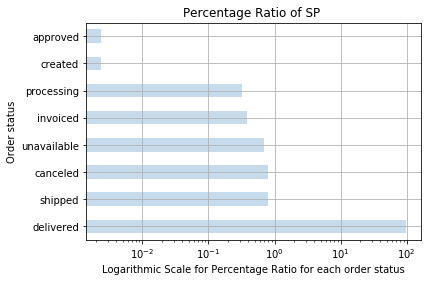

In [19]:
import matplotlib.pyplot as plt
df_top_perct.plot(kind="barh",alpha=0.25)
plt.xscale('log')
plt.title('Percentage Ratio of SP ')
plt.xlabel('Logarithmic Scale for Percentage Ratio for each order status')
plt.ylabel('Order status')
plt.grid(True)

### In the orders dataset, Derive year, month and day from the the column "order_purchase_timestamp" using apply() function

In [20]:
df_be_orders['order_purchase_timestamp']=df_be_orders['order_purchase_timestamp'].apply(lambda x: x.date())

### Drop the column "order_approved_at" from orders dataset

In [21]:
df_be_orders=df_be_orders.drop('order_approved_at',axis=1)

### From the three datasets, find out the top 5 cities where customers gave minimum review score

In [29]:
#Shape of Reviews has mismatch
print(df_be_reviews.shape, df_be_orders.shape ,df_be_customers.shape)
#The difference is due to the fact that same order id was reviewed multiple times by the user
#Hence we will find the reviews of the most recent review_answer_timestamp of [df_be_reviews] column
df_be_reviews_max=df_be_reviews.groupby('order_id').agg({"review_answer_timestamp":"max"}).reset_index()
#Once done we need to rename the column and do merge to reduce the size to 99441
df_be_reviews_max.columns=['order_id','review_answer_timestamp']
df_reviews_correct=pd.merge(df_be_reviews,df_be_reviews_max)
#Shape of Reviews after correction
print(df_reviews_correct.shape, df_be_orders.shape ,df_be_customers.shape)

#Now we will merge three tables and find the top 5 cities where customer gave minimum review score
min_rev_score=pd.merge(df_reviews_correct,df_cust_ord)
print("Top 5 cities who have given minimum review score")
min_rev_score[min_rev_score['review_score']==min_rev_score.review_score.min()]['customer_city'].value_counts()[:5]

(100000, 7) (99441, 7) (99441, 5)
(99441, 7) (99441, 7) (99441, 5)
Top 5 cities who have given minimum review score


sao paulo         1644
rio de janeiro    1177
belo horizonte     312
brasilia           259
salvador           242
Name: customer_city, dtype: int64

### Export all the orders from order datasets for above 5 cities into a csv file

In [30]:
cust_city=min_rev_score[min_rev_score['review_score']==min_rev_score.review_score.min()]['customer_city'].value_counts()[:5].index.to_list()
df_be_orders=df_be_orders[df_be_orders['customer_id'].isin(df_be_customers[df_be_customers['customer_city'].isin(cust_city)]['customer_id'].values)]
df_be_orders.to_csv("olist_orders.csv")